In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
sns.get_dataset_names()

C:\Users\Furkan\anaconda3\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\Furkan\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [18]:
df = sns.load_dataset("car_crashes")
df = df.select_dtypes(include = ['float64', 'int64'])

In [20]:
veri = df.copy()

In [21]:
veri.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63


In [22]:
veri.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [24]:
df.isnull().values.any()

False

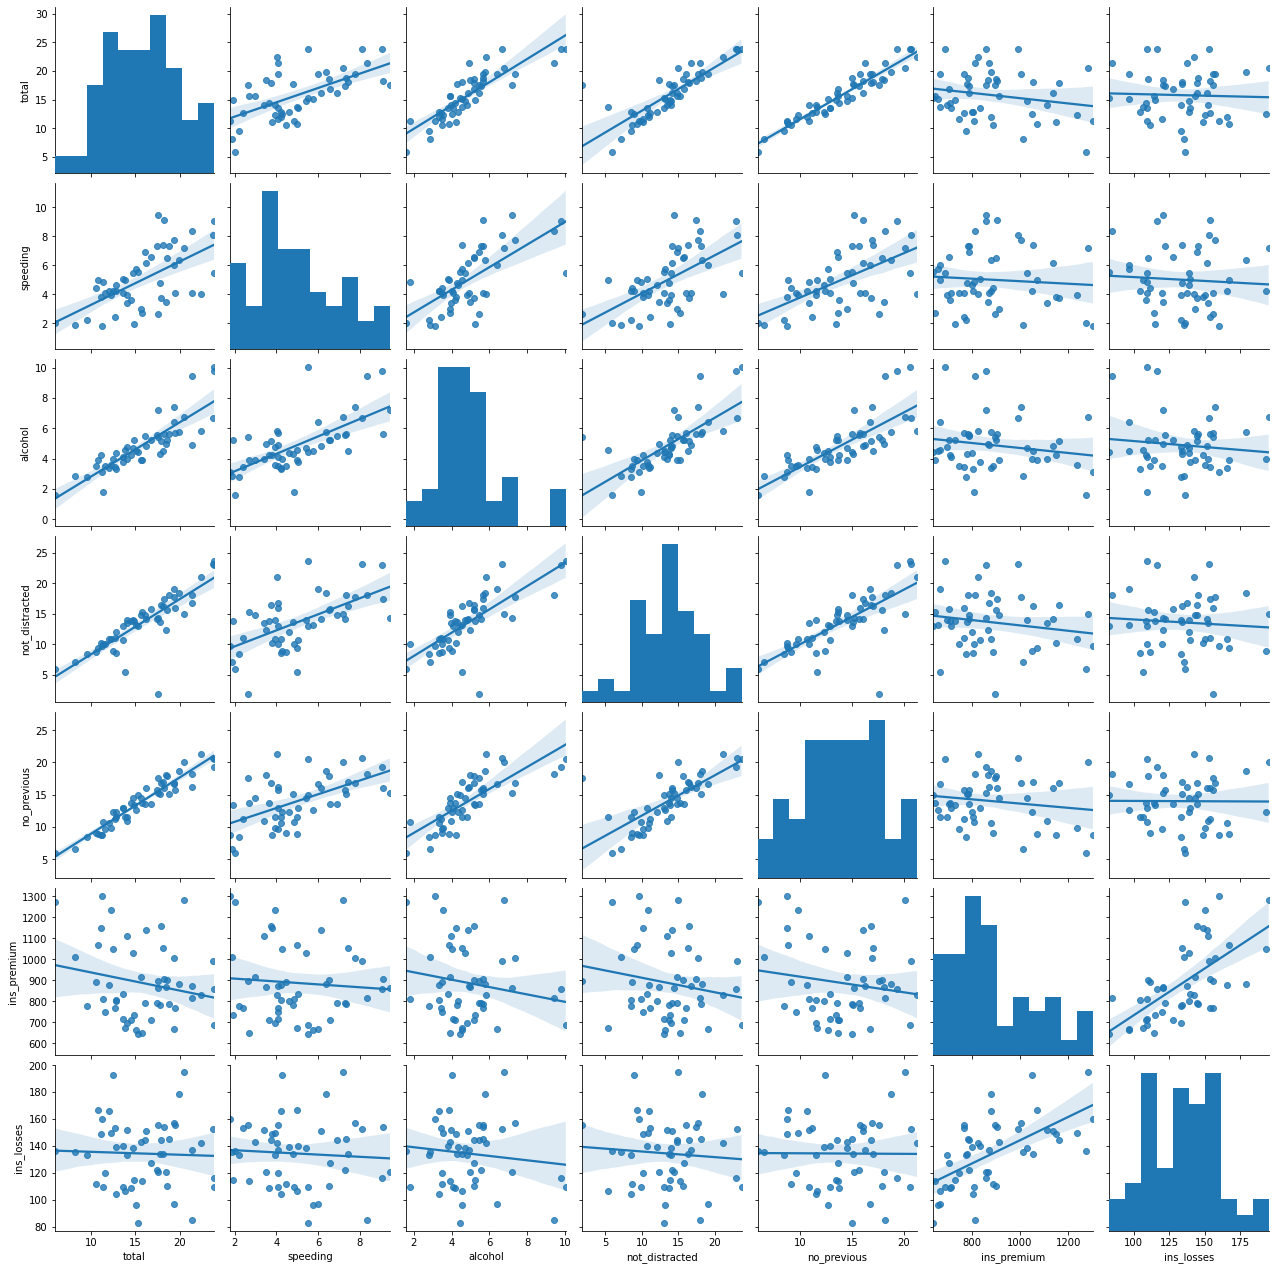

In [25]:
sns.pairplot(veri, kind="reg")

In [26]:
import statsmodels.api as sm

In [27]:
X = df[["total"]]

In [28]:
y = df["alcohol"]

In [29]:
lm = sm.OLS(y,X)
model = lm.fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                alcohol   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1552.
Date:                Sat, 03 Oct 2020   Prob (F-statistic):                    2.58e-39
Time:                        17:34:54   Log-Likelihood:                         -67.817
No. Observations:                  51   AIC:                                      137.6
Df Residuals:                      50   BIC:                                      139.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total          0.3125      0.008     39.400      0.000       0.297       0.328
==============================================================================
Omnibus:                       15.722   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.272
Skew:                           1.139   Prob(JB):                     6.53e-05
Kurtosis:                       4.970   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.params

total    0.312499
dtype: float64

In [32]:
predict_y = model.predict(X)

In [33]:
tablo = pd.DataFrame({
    "tahmin" : predict_y,
    "gercek" : y
})

In [34]:
tablo

,tahmin,gercek
0,5.874990,5.640
1,5.656240,4.525
2,5.812490,5.208
3,6.999988,5.824
4,3.749993,3.360
5,4.249993,3.808
6,3.374994,3.888
7,5.062491,4.860
8,1.843747,1.593
9,5.593740,5.191


In [35]:
tablo["fark"] = abs(tablo["tahmin"] - tablo["gercek"])

In [36]:
tablo

,tahmin,gercek,fark
0,5.874990,5.640,0.234990
1,5.656240,4.525,1.131240
2,5.812490,5.208,0.604490
3,6.999988,5.824,1.175988
4,3.749993,3.360,0.389993
5,4.249993,3.808,0.441993
6,3.374994,3.888,0.513006
7,5.062491,4.860,0.202491
8,1.843747,1.593,0.250747
9,5.593740,5.191,0.402740


In [39]:
model.params

total    0.312499
dtype: float64

In [ ]:
#total = 0.3125 * alcohol +0.008

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y,model.fittedvalues)

In [46]:
np.sqrt(mse)

0.9146758794142145

In [47]:
#ÇOKLU DOĞRUSAL REGRESYON

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [49]:
X = veri.drop("total", axis = 1)
y = veri["total"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 42)

In [ ]:
#STATSMODELS İLE DOĞRUSAL REGRESYON KURULUMU

In [55]:
lm = sm.OLS(y_train, X_train)

In [56]:
model = lm.fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  total   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2960.
Date:                Sat, 03 Oct 2020   Prob (F-statistic):                    4.77e-48
Time:                        17:50:24   Log-Likelihood:                         -47.367
No. Observations:                  43   AIC:                                      106.7
Df Residuals:                      37   BIC:                                      117.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
speeding           0.0723      0.083      0.873      0.389      -0.096       0.240
alcohol            0.4711      0.136      3.472      0.001       0.196       0.746
not_distracted     0.2390      0.065      3.652      0.001       0.106       0.372
no_previous        0.6470      0.076      8.504      0.000       0.493       0.801
ins_premium       -0.0007      0.001     -0.907      0.370      -0.002       0.001
ins_losses         0.0098      0.006      1.629      0.112      -0.002       0.022
==============================================================================
Omnibus:                        3.586   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                2.770
Skew:                           0.617   Prob(JB):                        0.250
Kurtosis:                       3.158   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [59]:
rmse #eğitim hatası

0.7280556605746021

In [64]:
tablo = pd.DataFrame ({
    "gercek" : y_test,
    "tahmin" : model.predict(X_test),
    "fark" : abs(tablo["gercek"] - tablo["tahmin"])
})

In [65]:
tablo

,gercek,tahmin,fark
43,19.4,19.969900,0.569900
40,23.9,23.788305,0.111695
46,12.7,12.601707,0.098293
12,15.3,15.635298,0.335298
24,17.6,15.435193,2.164807
31,18.4,17.748098,0.651902
17,21.4,17.825691,3.574309
32,12.3,11.477972,0.822028
